In [58]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [59]:
# importing dataset
data = pd.read_csv('sonar_data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [60]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [61]:
# preprocessing to identify null data
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [62]:
# importing machine learning models
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score, roc_curve, classification_report

In [63]:
# number of rows and columns
data.shape

(208, 61)

In [64]:
# counting the number of values of target column
data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [65]:
# transforming Mine and Rock to numbers 1 and 0 to execute the machine learning model
a = {'M':1,
    'R':0}



In [66]:
data[60] = data[60].map(a)

In [67]:
# checking if the tranform is done correctly
data[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [68]:
#dividing the features and target dataset
X = data.drop([60], axis=1)
y= data[60]

In [69]:
# splitting the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [70]:
# fitting and predicting data
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [73]:
# classification report with some of the main metrics
classification = classification_report(y_test, pred)
print(classification)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.79      0.86      0.83        22

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



In [76]:
# metrics for test
acc_test = accuracy_score(y_test, pred )
precision_test = precision_score(y_test, pred)
recall_test = recall_score(y_test, pred)
f1_test = f1_score(y_test, pred)
roc_auc_score = roc_auc_score(y_test, pred)
print(f'Accuracy score is {acc_test} \nPrecision is {precision_test} \nRecall is {recall_test} \nF1 Score is {f1_test} \nROC-AUC score is {roc_auc_score}')

Accuracy score is 0.8095238095238095 
Precision is 0.7916666666666666 
Recall is 0.8636363636363636 
F1 Score is 0.8260869565217391 
ROC-AUC score is 0.8068181818181819


In [54]:
# true positive ratin, true negative rating an limit to generate a ROC Curve
tpr, tnr, limit = roc_curve(y_test, pred)


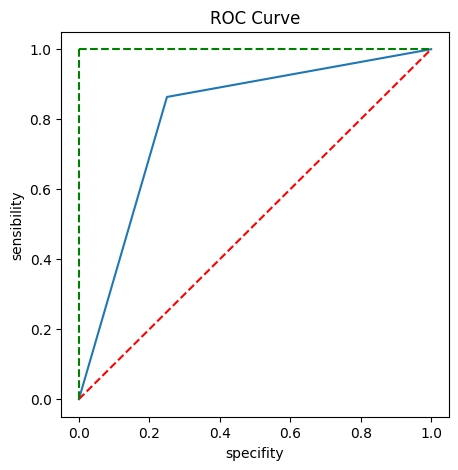

In [55]:
plt.subplots(1, figsize = (5,5))
plt.title('ROC Curve')
plt.plot(tpr, tnr)
plt.xlabel('specifity')
plt.ylabel('sensibility')
plt.plot([0,1], ls = "--", c='red') #linha guia pontilhada vermelha
plt.plot([0,0], [1,0], ls= '--', c='green'), plt.plot([1,1], ls= '--', c='green') #linha guia pontilhada verde
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[15,  5],
       [ 3, 19]])